<a href="https://colab.research.google.com/github/vyshnavi9241/knn-classifier-using-wheat-prediction/blob/main/knn_classifier_using_wheat_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
df = pd.read_csv('wheat_seed.csv', sep='\t')
df.head()

,Area,Environment,Compactness,Length_of_the_nucleus,Width_of_the_core,Coefficient_of_asymmetry,Length_of_the_core_groove,Class,Class_names
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


In [4]:
df.Class.unique(), df.Class_names.unique()

(array([1, 2, 3]), array(['Kama', 'Rosa', 'Canadian'], dtype=object))

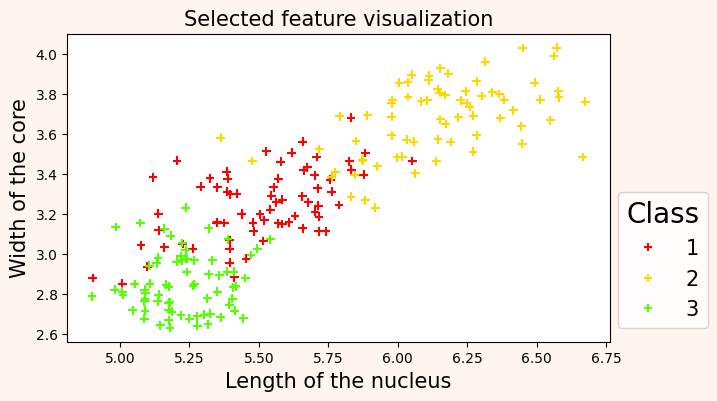

In [9]:
plt.figure(figsize=(7, 4), facecolor='seashell')
sc = plt.scatter(df.Length_of_the_nucleus, df.Width_of_the_core, s=40, c=df.Class, marker='+', cmap='prism')
plt.xlabel('Length of the nucleus', fontsize=15)
plt.ylabel('Width of the core', fontsize=15)
plt.title('Selected feature visualization', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(*sc.legend_elements(), title='Class', fontsize=15, title_fontsize=20, bbox_to_anchor=(1.20, 0.52));

In [11]:
x= df.iloc[:, :-2]
y = df.loc[:, 'Class']

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(168, 42, 168, 42)

In [19]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [20]:
print(f'Accuracy on the test set: {knn.score(X_test, y_test)}')

Accuracy on the test set: 0.9285714285714286


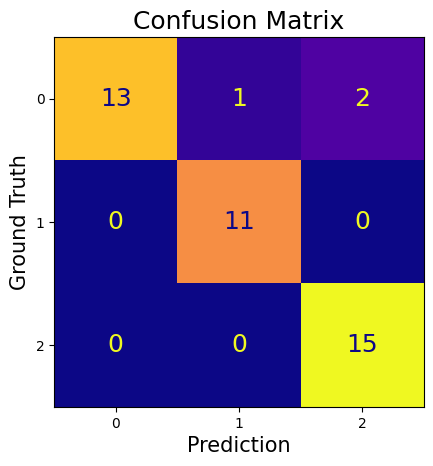

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='plasma', colorbar=False, text_kw={'size': 18})

plt.xlabel('Prediction', fontsize=15)
plt.ylabel('Ground Truth', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

In [24]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9285714285714286


In [23]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.81      0.90        16
           2       0.92      1.00      0.96        11
           3       0.88      1.00      0.94        15

    accuracy                           0.93        42
   macro avg       0.93      0.94      0.93        42
weighted avg       0.94      0.93      0.93        42



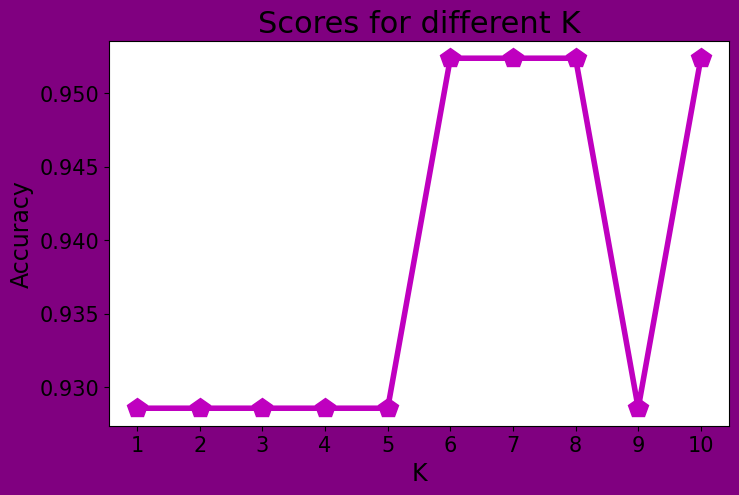

In [25]:
scores = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    nk = np.arange(10) + 1

plt.figure(figsize=(8, 5), facecolor='purple')

plt.plot(nk, scores, color='m', marker='p', markersize=15, linewidth=4)
plt.xlabel('K', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.title('Scores for different K', fontsize=22)
plt.xticks(nk, fontsize=15)
plt.yticks(fontsize=15);